In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma, norm, binom, uniform, t
import numdifftools as nd
from sklearn.linear_model import LinearRegression as linreg
import sympy as sym
from scipy.optimize import brentq, minimize
from datetime import datetime as dt

* Please email me (ianzhang@connect.hku.hk) if you find any mistakes in the script. 

# Bayesian Inference

$\pi(\theta|\mathbf{x})\propto L(\theta|\mathbf{x})\pi(\theta)=\prod_{i=1}^nf(x_i|\theta)\pi(\theta)$, what will happen if $n$ is very large? 

## Normal example

Assume model $f(x|\mu)=N(x|\mu, \tau)$ and prior $\pi(\mu)=N(\mu|\mu_0, \tau_0)$, where $\tau$ and $\tau_0$ are the precisions (reciprocal of the variance). 

With $n$ samples $\mathbf{x}=(x_1,\dots,x_n)$ from the model, we have the posterior: 
$$
\pi(\mu|\mathbf{x})=N(\mu|\frac{n\tau\overline{x}+\tau_0\mu_0}{n\tau+\tau_0}, n\tau+\tau_0)
$$

A prior is just like the regularization in Machine Learning. It serves as bias–variance tradeoff method and always results in more bias but less variance. 

## Beta prior and Binomial model (Conjugate prior example)

Assume model $f(y|p)=Binomial(y|n,p)$ and prior $\pi(p)=Beta(p|\alpha, \beta)$. 

With $1$ sample $y$ from the Binomial model (or equivalently $n$ samples $\mathbf{x}=(x_1,\dots,x_n)$ ($y=\sum_{i=1}^nx_i)$ from a Bernoulli model $f(x|p)=Bernoulli(x|p)$), we have the posterior: 
$$
\pi(p|y)=\pi(p|\mathbf{x})=Beta(p|\alpha+y, \beta+n-y)
$$

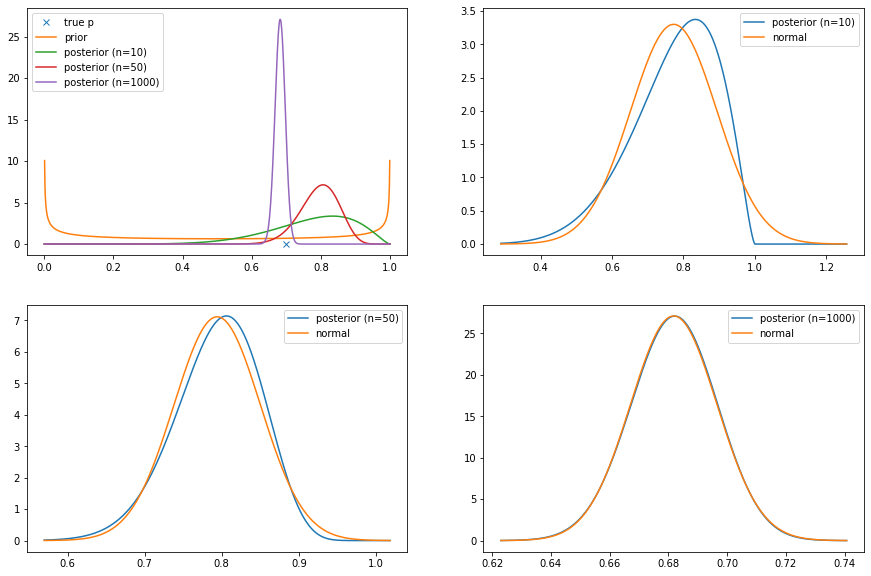

In [2]:
np.random.seed(19971107)
a, b = 0.5, 0.5
p = 0.7
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
axs = axs.flatten()

xx = np.linspace(0, 1, 1000)
axs[0].plot(p, 0, 'x', label='true p')
axs[0].plot(xx, beta.pdf(x=xx, a=a, b=b), label='prior')

for i, n in enumerate([10, 50, 1000]):
    y = binom.rvs(n=n, p=p)
    posterior = beta(a=a+y, b=b+n-y)
    axs[0].plot(xx, posterior.pdf(xx), label='posterior (n={})'.format(n))
    
    loc = posterior.mean()
    scale = posterior.std()
    xx_zoomin = np.linspace(loc - 4*scale, loc + 4*scale, 1000)
    axs[i+1].plot(xx_zoomin, posterior.pdf(xx_zoomin), label='posterior (n={})'.format(n))
    axs[i+1].plot(xx_zoomin, norm.pdf(xx_zoomin, loc=loc, scale=scale), label='normal'.format(n))

for ax in axs:
    ax.legend()
    
plt.show()

Under certain regularity conditions, the posterior distribution approaches a Gaussian as the number of samples grows (refer to this book http://www.stat.columbia.edu/~gelman/book/). This justifies the application of Laplace's method. 

**Think further:** Can you construct a simple example where this Gaussian phenomenon wouldn't appear? Is there any other Gaussian phenomenon appear in your example? 

## Laplace approximation

Assume the data set is big enough to make the posterior $\pi(\theta|\textbf{x})$ looks like a normal. Set $\theta^*$ to be the posterior mode, which means $\frac{\partial}{\partial\theta}\pi(\theta^*|\textbf{x})=0$. We know that there exists a $\sigma^2$ so that
$$
\pi(\theta|\textbf{x})\approx\frac{\pi(\theta^*|\textbf{x})}{N(\theta^*|\theta^*, \sigma^2)}N(\theta|\theta^*, \sigma^2)
$$
To derive the $\sigma^2$, we take a $\log$ on both sides and have the Taylar's expansion (https://en.wikipedia.org/wiki/Taylor_series) of the left side of the above equation at $\theta^*$: 
$$
\log\pi(\theta^*|\textbf{x})+\frac{\partial}{\partial\theta}\log\pi(\theta^*|\textbf{x})(\theta-\theta^*)+\frac{1}{2}\frac{\partial^2}{\partial\theta^2}\log\pi(\theta^*|\textbf{x})(\theta-\theta^*)^2\approx\log\pi(\theta|\textbf{x})\approx\log\pi(\theta^*|\textbf{x})-\frac{1}{2\sigma^2}(\theta-\theta^*)^2
$$
Note that $\frac{\partial}{\partial\theta}\log\pi(\theta^*|\textbf{x})=0$, so if we take $\sigma^2=(-\frac{\partial^2}{\partial\theta^2}\log\pi(\theta^*|\textbf{x}))^{-1}$, all kinds of inference based on $\pi(\theta|\textbf{x})$ can be approximated based on the normal distribution (multiplied by a constant). For example: 
$$
\mathbb{E}_{\pi(\theta|\mathbf{x})}[h(\Theta)]\approx\frac{\pi(\theta^*|\textbf{x})}{N(\theta^*|\theta^*, \sigma^2)}\mathbb{E}_{N(\theta|\theta^*, \sigma^2)}[h(\Theta)]
$$
for a function $h(\theta)$. 

Another interesting thing is that, as, on the above reasoning, we didn't use the condition that the posterior was normalized. If $\pi(\theta|\textbf{x})$ is unnormalized, we can actually set $h(\theta)=1$ to approximate the normalizing constant 
$$
Z\approx\hat{Z}=\frac{\pi(\theta^*|\textbf{x})}{N(\theta^*|\theta^*, \sigma^2)}
$$

* Try using the Laplace approximation to estimate the normalizing constant of the beta posterior $Beta(p|\alpha+y, \beta+n-y)$, which is actually already normalized. Draw the absolute error $|\hat{Z}-1|$ against $n$ based on the loglog plot (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog). What is the convergence rate? (hints: you can use the 'numdifftools' package (https://pypi.org/project/numdifftools/) and 'LinearRegression' from 'sklearn.linear_model' (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression); if $err = cn^{-r}$, $\log(err)=\log(c)-r\log(n)$)

**Think further:** Is this convergence rate true for other estimations? Try some examples. 

# Monte Carlo

## (Naive) Monte Carlo Integration

h(x) =


(x + sin(20*x) + cos(1000*x))**2

Integral of h(x) =


x**3/3 + x*sin(20*x)**2/2 + x*sin(1000*x)**2/2 + x*sin(1000*x)/500 + x*cos(20*x)**2/2 - x*cos(20*x)/10 + x*cos(1000*x)**2/2 + 5*sin(20*x)*sin(1000*x)/2499 - sin(20*x)*cos(20*x)/40 + sin(20*x)/200 + sin(1000*x)*cos(1000*x)/2000 + cos(20*x)*cos(1000*x)/24990 + cos(1000*x)/500000

Integrate h(x) from 0 to 1: 1.2911408958116635


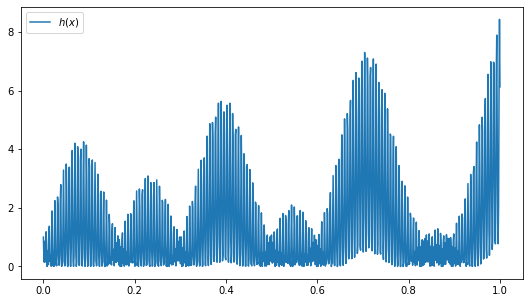

In [3]:
x = sym.Symbol('x')
h = (x+sym.sin(20*x)+sym.cos(1000*x))**2
h_int = sym.integrate(h)
print('h(x) =')
display(h)
print('Integral of h(x) =')
display(h_int)

h = sym.lambdify(x, h)
h_int = sym.lambdify(x, h_int)
mu = h_int(1) - h_int(0)
print('Integrate h(x) from 0 to 1: {}'.format(mu))

xx = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize = (9, 5))
ax.plot(xx, h(xx), label='$h(x)$')
ax.legend()
plt.show()

For the highly irregular integrand $h(x)$, Monte Carlo (MC) will be your only choice to do numerical integration. 

Based on the LLT (Law of Large Numbers):
$$
\mu=\int_a^bh(x)\mathrm{d}x=(b-a)\mathbb{E}_{U(a,b)}[h(X)]\approx\hat{\mu}=\frac{(b-a)}{n}\sum_{i=1}^nh(x_i), x_i\sim U(a,b)
$$

Based on the CLT (Central Limit Theorem):
$$
\sqrt{n}\frac{(\hat{\mu}-\mu)}{\sigma}\to N(0, 1), \sigma^2=(b-a)^2\mathrm{Var}_{U(a,b)}[h(X)]
$$

which gives the $95\%$ confidence interval (C.I.):
$$
[\hat{\mu}-\frac{1.96\hat{\sigma}}{\sqrt{n}}, \hat{\mu}+\frac{1.96\hat{\sigma}}{\sqrt{n}}], \hat{\sigma}^2=(b-a)^2\hat{\mathrm{Var}}[h(x_i)]
$$
where $\hat{\mathrm{Var}}[h(x_i)]$ means the sample variance. 

Always construct the C.I. when you do estimation as it contains more information. The popularity of the confidence interval also comes from a theorem that, under some conditions, it converges with a speed of $n^{-1}$, while the point estimate normally only converges at the rate of $n^{-0.5}$ (refer to this book https://statweb.stanford.edu/~owen/mc/). 

* Estimate the integration of $h(x)$ from 0 to 1. Draw the point estimates and the corresponding confidence intervals against differents sample sizes $n$ in a single plot, where you should use the true value $\mu$ as a reference line. Draw the errors of the point estimates against $n$ in a loglog plot and check its convergence rate. 

**Think further:** Here I assigned weights for the linear regression, do you know why? Try what will happen without the weights. How to do the linear regression to estimate the convergence rate properly without the weights?

## Sampling - the core of MC

Sampling is process to transform an distribution (or an integrable nonnegative function) $\pi(x)$ to a series of points $\{x_1,\dots,x_n\}$, which make it easier to estimate all kinds of the global properties of the distribution, like the mean, the variance, the covariance, the probability in an area, the quantile, the number of modes (local maximum points), the rough positions of all modes. In a word, the samples can represent the distribution $\pi(x)$:
$$
\hat{\Pi}(x)=\frac{1}{n}\sum_{i=1}^n\mathbf{1}(x_i\le x)\to\mathbb{E}_\pi[\mathbf{1}(X\le x)]=\Pi(x)
$$

There are three amazing points about the MC: 
1. It is universal. Besides the above global properties, MC can be used as an alternative for optimization in the Machine Learning with a simple but powerful techique called the Annealing, while optimization can't replace MC. 
2. It is robust. MC estimation generally has a convergence rate of $n^{-0.5}$ which wouldn't be influenced by the roughness of related functions or the curse of dimensionality. On the other hand, if you develop an algorithm with convergence rate worse than $n^{-0.5}$, your algorithm is even worse than random! 
3. It is modest. Although lack of accuracy, different the optimization methodologies, MC provides many tools to evaluate the reliability of an estimation, like the CLT and the Bootstrap. 

### The Inversion Method

A random variable $X$ with a reversible cdf $F(x)$ can be sampled by $x_i=F^{-1}(u_i), u_i\sim U(0, 1), i=1,\dots,n$. This is a fundamental important method as all the initial pseudo random numbers generated by the computer always follows $U(0, 1)$. 

* Try to generate standard normal random samples if you only have the cdf of the normal distribution. Compare the samples with the normal pdf. (hints: use the 'norm.cdf' and the 'brentq' function from 'scipy.optimize' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html)))

### Transformation

Sampling based on the relationships between different variables. The Inversion Method can be viewed as a special case of the Transformation. For more Information, check this https://en.wikipedia.org/wiki/Relationships_among_probability_distributions. 

### Sequential Simulation

Sampling based on the dependency between variables. A typical example is the mixture model $p(x)=\sum_{j=1}^mw_jp_j(x), \sum_{j=1}^mw_j=1$. To draw $n$ samples from $p(x)$, we firstly simulate $(n_1,\dots,n_m)\sim Multinomial(n;w_1,\dots,w_m)$, and than, draw $n_j$ samples from $p_j(x)$. Combining the $m$ groups of samples together, we finally have the $n$ samples from the mixture model. 

### Rejection Sampling

Another fundamental important method to draw i.i.d. samples. It generally says that we can generate variable $Y$ from variable $X$ as long as the density of $X$ covers that of $Y$. Or, if we put it another way, variable $X$ can generate any variables whose densities can be covered by the $X$'s density. The spirit of Rejection Sampling actually coincide that of the axiom schema of specification in the set theory (https://en.wikipedia.org/wiki/Axiom_schema_of_specification). Essentially, it says that any definable subclass of a set is a set. People considered it the most important axiom of the set theory as it avoided the famous Russell's paradox (https://en.wikipedia.org/wiki/Russell%27s_paradox). 

**Think further:** Check the axioms in ZFC (a standard set theory system, https://encyclopediaofmath.org/index.php?title=ZFC) to see if there are any other related sampling schemes. 

The procedure of Rejection Sampling (given the target distribution $\pi(x)$ and an envelope distribution $q(x)$):
1. Draw initial samples $\{x_1,\dots,x_m\}$ from $q(x)$, and calculate the corresponding ratios or weights $\{w_1,...,w_m\},w_j=w(x_j)=\pi(x_j)/q(x_j)$; 
2. Calculate $C=\sup w(x)$, and accept each sample $x_j$ with the probability $p_j=w_j/C$ to obtain the final samples $\{x_1^*,\dots,x_n^*\}$. 

There are two ways to do the sampling: 
1. We can start the sampling with $m=1$, and increase $m$ until enough final samples are obtained (each sample only be accepted or rejected once). 
2. Or because the acceptance rate is $1/C$, to obtain $n$ final samples, we can set $m=Cn$ and make a ‘refund for any overpayment or a supplemental payment for any deficiency’ (多退少补). 

* Draw samples from a standard norm distribution based on the t distribution with 1 degree of freedom. Which of the above two sampling methods is faster? (hints: use the 'minimize' function from 'scipy.optimize' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html); use the 'datetime' package for timing (https://stackoverflow.com/questions/766335/python-speed-testing-time-difference-milliseconds)

**Think further:** When $m$ is big, is it reasonable to replace $C$ in the step 2 by the $\max w_j$? What's the benefits if we do so? Will the resulting final samples still follow the target distribution? Justify your thoughts by mathematics or by simulations. 

### Importance Sampling

Remember that sampling is to generate samples to represent the target distribution $\pi(x)$. Different from all the above sampling schemes, the Importance Sampling (IS) generates weighted samples to represent $\pi(x)$. With the proposal distribution $q(x)$ where $x_i$ comes from, we have the non-ratio version weighted samples $\{(x_1,w_1),\dots,(x_n,w_n)\}, w_i=w(x_i)/n$ or the ratio version weighted samples $\{(x_1,w_1),\dots,(x_n,w_n)\}, w_i=w(x_i)/\sum_{i=1}^nw(x_i)$, where $w(x)=\pi(x)/q(x)$ is called the likelihood ratio function or the importance weight function. Here one pair $(x_i,w_i)$, instead of $x_i$, is one single sample. And the ratio version is useful when $\pi(x)$ or $q(x)$ is unnormalized. 

**Think further:** Note that the Rejection Sampling and the Importance Sampling both use the ratio function $w(x)$, so what's the relationship between them? 

Just like before, under some mild conditions, the weighted samples represent the target distribution in the sense that
$$
\hat{\Pi}(x)=\sum_{i=1}^nw_i\mathbf{1}(x_i\le x)\to\mathbb{E}_q[\frac{\pi(X)}{q(X)}\mathbf{1}(X\le x)]=\mathbb{E}_\pi[\mathbf{1}(X\le x)]=\Pi(x)
$$
And also for a function $h(x)$:
$$
\mu=\mathbb{E}_\pi[h(X)]\approx\hat{\mu}=\sum_{i=1}^nw_ih(x_i)
$$
holds for both the ratio and non-ratio weighted samples. 

For the estimator $\hat{\mu}$ with non-ratio weights, we have the asymptotic variance
$$
n\mathrm{Var}_q[\hat{\mu}]\to\mathbb{E}_q[(w(X)h(X)-\mu)^2]=\int\frac{(\pi(x)h(x)-\mu q(x))^2}{q(x)}\mathrm{d}x=\int\frac{(\pi(x)h(x))^2}{q(x)}\mathrm{d}x-\mu^2
$$
Straightly following Jensen’s inequality (https://en.wikipedia.org/wiki/Jensen%27s_inequality), the last expression gives the variance minimizer $q(x)\propto\pi(x)|h(x)|$. As for the estimator with ratio weights, based on the Delta method (https://en.wikipedia.org/wiki/Delta_method), we can derive the asymptotic variance
$$
n\mathrm{Var}_q[\hat{\mu}]\to\mathbb{E}_q[w(X)^2(h(X)-\mu)^2]=\int\frac{\pi(x)^2(h(x)-\mu)^2}{q(x)}\mathrm{d}x
$$
indicating an optimal proposal $q(x)\propto\pi(x)|h(x)-\mu|$ different from the previous one. 

In the non-ratio version, IS can potentially give us the zero variance estimator if and only if $h(x)$ is always positive or negative on its support. In the ratio version, the asymptotic variance is zero if and only if $h(x)=c$ for a constant $c$, in which case, we don't even need to do the estimation. 

* Let's return to the Laplace approximation example. This time, try using the non-ratio IS to estimate the normalizing constant of the beta posterior $Beta(p|\alpha+y, \beta+n-y)$ ($n$ here is not the sample size of IS samples), which is actually already normalized. Use the Laplace approximation to build the IS proposal, and do the IS estimation based on 100 samples for different $n$. Still, draw the absolute error $|\hat{Z}-1|$ against $n$ based on the loglog plot. What is the convergence rate? 

This time, I used a little technique called the Common Random Numbers (https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/4261/glasserman_yao_guidelines.pdf). I generated 'samples0' in advance and transformed it to 'samples' for every given IS normal proposal. This technique is especially useful when you want to compare a random value with respect to different parameters. Try what will happen if you don't use the Common Random Numbers. 

**Think further:** Compare the codes here with that of the Laplace approximation example. Is the Laplace approximation looks like Importance Sampling with only one sample? Why is the performance of IS so different from that of the Laplace approximation? 